references: 
- https://www.kdnuggets.com/2020/04/dbscan-clustering-algorithm-machine-learning.html
- https://www.analyticsvidhya.com/blog/2020/09/how-dbscan-clustering-works/


In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.model_selection import train_test_split
from numpy import sqrt, array, random, argsort
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


#from google.colab import drive
#drive.mount('/content/gdrive')

In [ ]:
df =  pd.read_csv("https://raw.githubusercontent.com/AIML-Makgeolli/CpE-AIDL/main/thesis_database/Crop_recommendation.csv")
df_train = df.drop(['label','rainfall'], axis = 1)
df_train.head()

,N,P,K,temperature,humidity,ph
0,90,42,43,20.879744,82.002744,6.502985
1,85,58,41,21.770462,80.319644,7.038096
2,60,55,44,23.004459,82.320763,7.840207
3,74,35,40,26.491096,80.158363,6.980401
4,78,42,42,20.130175,81.604873,7.628473


In [ ]:
X_N = df_train[['N']] #.iloc[:100]
X_P = df_train[['P']]
X_K = df_train[['K']]
X_temp = df_train[['temperature']]
X_moist = df_train[['humidity']]
y = df_train[['ph']] #.iloc[:100]

In [ ]:
#Split Test Data #X = N y = ph
X = X_P #X = Nitrogen data column
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=42)
#Combine X_train and y_train into one dataframe
data = pd.concat([X_train, y_train], axis=1).to_numpy()

Version 1: https://www.kdnuggets.com/2020/04/dbscan-clustering-algorithm-machine-learning.html

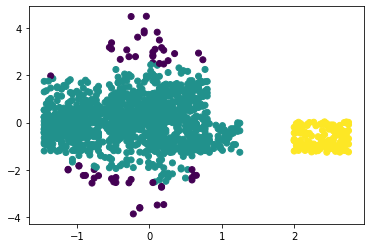

In [ ]:
X_trn = StandardScaler().fit_transform(data)
y_pred = DBSCAN(eps=0.3, min_samples = 10).fit_predict(X_trn)
#labels = y_pred.labels_

plt.scatter(X_trn[:,0], X_trn[:,1], c=y_pred)

Version 2: https://www.section.io/engineering-education/dbscan-clustering-in-python/

In [ ]:
from sklearn.neighbors import NearestNeighbors
neighb = NearestNeighbors(n_neighbors=2) 
nbrs=neighb.fit(data)
distances,indices=nbrs.kneighbors(data)

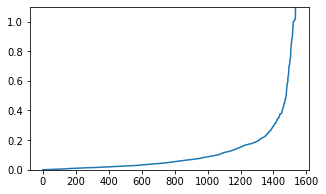

In [ ]:
distances = np.sort(distances, axis = 0) 
distances = distances[:, 1] 
plt.rcParams['figure.figsize'] = (5,3)
plt.plot(distances)
plt.ylim(0, 1.10)
plt.show()

In [ ]:
X_trn = StandardScaler().fit_transform(data)
dbscan = DBSCAN(eps = 1, min_samples = 4).fit(X_trn)
labels = dbscan.labels_
labels

array([0, 0, 0, ..., 0, 0, 0])

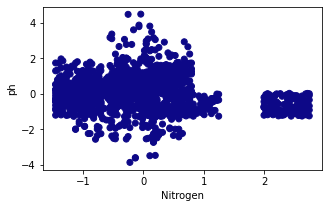

In [ ]:
plt.scatter(X_trn[:, 0], X_trn[:,1], c = labels, cmap= "plasma")
plt.xlabel("Nitrogen")
plt.ylabel("ph")
plt.show()

In [ ]:
X_trn = StandardScaler().fit_transform(data)

In [ ]:
db = DBSCAN(eps=0.3, min_samples=10).fit(X_trn)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(y_pred, labels))
print("Completeness: %0.3f" % metrics.completeness_score(y_pred, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(y_pred, labels))
print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(y_pred, labels))
print(
    "Adjusted Mutual Information: %0.3f"
    % metrics.adjusted_mutual_info_score(y_pred, labels)
)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X_trn, labels))

Estimated number of clusters: 2
Estimated number of noise points: 57
Homogeneity: 1.000
Completeness: 1.000
V-measure: 1.000
Adjusted Rand Index: 1.000
Adjusted Mutual Information: 1.000
Silhouette Coefficient: 0.476


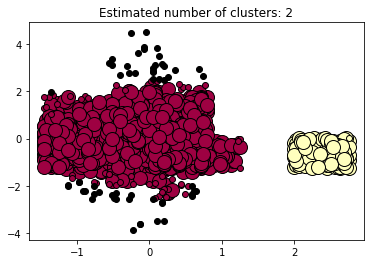

In [ ]:
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X_trn[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X_trn[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()